In [1]:
import numpy as np

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Load shapefiles

In [2]:
ca_state_outline = gpd.read_file('/home/jovyan/shared/deep_well/data/shapefiles/california_state_outline/CA_State_TIGER2016.shp')

In [3]:
ca_state_outline.to_crs(epsg=4326, inplace=True)

In [4]:
ca_state_outline.crs

{'init': 'epsg:4326', 'no_defs': True}

In [5]:
cv_outline = gpd.read_file('/home/jovyan/shared/deep_well/data/shapefiles/central_valley_shapfile/Alluvial_Bnd.shp')

In [6]:
cv_outline.to_crs(epsg=4326, inplace=True)

In [7]:
cv_outline.crs

{'init': 'epsg:4326', 'no_defs': True}

# Load well data shapefile

In [8]:
!ls /home/jovyan/shared/deep_well/data/well_data/

casgem		  ca_well_data.dbf  cnra_continuous_gwl
ca_well_data.cpg  ca_well_data.shp  cnra_periodic_gwl
ca_well_data.csv  ca_well_data.shx  README


In [9]:
well_data = gpd.read_file('/home/jovyan/shared/deep_well/data/well_data/ca_well_data.shp')

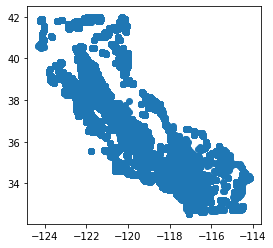

In [11]:
well_data.plot()

In [12]:
well_data.head(2)

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,PRD_OR_CON,geometry
0,01N04E36Q001M,2005-05-01,15.238,-8.338,37.886056,-121.481833,81.0,1,POINT (-121.48183333 37.88605556)
1,01N04E36Q001M,2005-06-01,15.130,-8.230,37.886056,-121.481833,81.0,1,POINT (-121.48183333 37.88605556)


# Looking at date ranges

In [15]:
well_data[well_data['PRD_OR_CON']==0]['MSMT_DATE'].min()

'1888-01-01'

In [16]:
well_data[well_data['PRD_OR_CON']==0]['MSMT_DATE'].max()

'2019-09-01'

In [17]:
well_data[well_data['PRD_OR_CON']==1]['MSMT_DATE'].min()

'1992-04-01'

In [18]:
well_data[well_data['PRD_OR_CON']==1]['MSMT_DATE'].max()

'2019-03-01'

# Save out monthly shapefiles

In [34]:
years = np.array([2019])
years

array([2019])

In [35]:
months = np.arange(1,10)
months

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
for year in years:
    for month in months:
        date_now = np.str(year) + '-' + np.str(month).zfill(2)+ '-01'
        print(date_now)
        #!mkdir /home/jovyan/shared/deep_well/data/well_data/{date_now}
        well_data_now = well_data[well_data['MSMT_DATE']==date_now]
        well_data_now.to_file('/home/jovyan/shared/deep_well/data/well_data/' + date_now + '/ca_well_data_' + date_now + '.shp')

2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01


In [89]:
for year in years:
    for month in months:
        date_now = np.str(year) + '-' + np.str(month).zfill(2)+ '-01'
        print(date_now)
        well_data_now = well_data[well_data['MSMT_DATE']==date_now]
        print(well_data_now.head(2))
        well_data_now.to_file('/home/jovyan/shared/deep_well/data/well_data/' + date_now + '/ca_well_data_' + date_now + '.geojson', driver='GeoJSON')

2019-01-01
            STATION   MSMT_DATE  GSE_WSE    WSE   LATITUDE   LONGITUDE  \
2733  05N03E09L001M  2019-01-01   16.784  0.826  38.290206 -121.647331   
2819  05N03E09L002M  2019-01-01   17.156  0.814  38.290198 -121.647363   

      WELL_DEPTH  PRD_OR_CON                           geometry  
2733        43.0           1  POINT (-121.64733086 38.29020604)  
2819        82.0           1  POINT (-121.64736277 38.29019763)  
2019-02-01
            STATION   MSMT_DATE  GSE_WSE    WSE   LATITUDE   LONGITUDE  \
2734  05N03E09L001M  2019-02-01   15.474  2.136  38.290206 -121.647331   
2820  05N03E09L002M  2019-02-01   15.830  2.140  38.290198 -121.647363   

      WELL_DEPTH  PRD_OR_CON                           geometry  
2734        43.0           1  POINT (-121.64733086 38.29020604)  
2820        82.0           1  POINT (-121.64736277 38.29019763)  
2019-03-01
            STATION   MSMT_DATE  GSE_WSE  WSE  LATITUDE  LONGITUDE  \
5010  07N02E35D001M  2019-03-01      NaN  NaN   38.4159

In [83]:
# test
test = gpd.read_file('/home/jovyan/shared/deep_well/data/well_data/2019-02-01/ca_well_data_2019-02-01.shp')

In [92]:
# test
test = gpd.read_file('/home/jovyan/shared/deep_well/data/well_data/2019-02-01/ca_well_data_2019-02-01.geojson')

In [93]:
test.head()

,STATION,MSMT_DATE,GSE_WSE,WSE,LATITUDE,LONGITUDE,WELL_DEPTH,PRD_OR_CON,geometry
0,05N03E09L001M,2019-02-01,15.474,2.136,38.290206,-121.647331,43.0,1,POINT (-121.64733086 38.29020604)
1,05N03E09L002M,2019-02-01,15.830,2.140,38.290198,-121.647363,82.0,1,POINT (-121.64736277 38.29019763)
2,05N03E20B001M,2019-02-01,8.138,5.712,38.270285,-121.661349,27.0,1,POINT (-121.66134915 38.27028472)
3,05N03E20B002M,2019-02-01,9.992,3.997,38.270311,-121.661340,57.0,1,POINT (-121.66134034 38.27031076)
4,05N03E20B003M,2019-02-01,10.995,2.965,38.270325,-121.661337,99.0,1,POINT (-121.66133658 38.27032465)


In [94]:
test.shape

(1738, 9)

In [95]:
testnow = test[pd.notnull(test['WSE'])]

In [96]:
testnow.shape

(1637, 9)

In [97]:
# Anthony got rid of the nans